# __Midterm Part III__

<br>

Finance 6470 - Derivatives<br>
Jared Warnock <br>
<br>
<br>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

<br>

### Simulate Spot, Basis & Futures for Oil and Gasoline

<br>

In [25]:
a1 = 0.342
b1 = 0.539
s1 = 0.11
a2 = 0.391
b2 = 0.560
s2 = 0.116
rho = 0.705
num_reps = 60
S1 = 0.69
S2 = 0.80
bss1 = -.02
bss2 = -.01

In [26]:
def draw_correlated_normals(mn1 = 0.0, sd1 = 1.0, mn2 = 0.0, sd2 = 1.0, rho = 0.5, num_reps = 100):
    z1 = np.random.normal(size=num_reps, loc=mn1, scale=sd1)
    z2 = np.random.normal(size=num_reps, loc=mn2, scale=sd2)
    z2 = rho * z1 + np.sqrt((1.0 - rho**2.0)) * z2
    
    return (z1,z2)

In [27]:
x1, x2 = draw_correlated_normals(sd1=0.11, sd2=0.116, rho=0.705, num_reps=45)
np.corrcoef(x1, x2)

array([[1.        , 0.66805033],
       [0.66805033, 1.        ]])

In [28]:
ln_spot1 = np.zeros(num_reps)
ln_spot2 = np.zeros(num_reps)

ln_spot1[0] = np.log(S1)
ln_spot2[0] = np.log(S2)

basis1 = np.zeros(num_reps)
basis2 = np.zeros(num_reps)

basis1[0] = bss1
basis2[0] = bss2

f1 = np.zeros(num_reps)
f2 = np.zeros(num_reps)

z1, z2 = draw_correlated_normals(sd1=s1, sd2=s2, rho=rho, num_reps=num_reps)

for t in range(1, num_reps):
    ln_spot1[t] = ln_spot1[t-1] + a1 * (b1 - np.exp(ln_spot1[t-1])) + z1[t]
    ln_spot2[t] = ln_spot2[t-1] + a2 * (b2 - np.exp(ln_spot2[t-1])) + z2[t] 

z1, z2 = draw_correlated_normals(sd1=s1, sd2=s2, rho=rho, num_reps=num_reps)
    
for t in range(1, num_reps):
    basis1[t] = a1 * basis1[t-1] + b1 * np.exp(ln_spot1[t-1])+ z1[t]
    basis2[t] = a2 * basis2[t-1] + b2 * np.exp(ln_spot1[t-1]) + z2[t]
    
for t in range(0, num_reps):
    f1[t] = np.exp(ln_spot1[t]) * np.exp(basis1[t])
    f2[t] = np.exp(ln_spot2[t]) * np.exp(basis2[t])


<br>

### Plot Data

<br>

In [29]:
tb = pd.DataFrame({'Heating Oil' : basis1, 'Gasoline' : basis2})
ts = pd.DataFrame({'Heating Oil' : np.exp(ln_spot1), 'Gasoline' : np.exp(ln_spot2)})
tf = pd.DataFrame({'Heating Oil' : f1, 'Gasoline' : f2})

datelist = pd.date_range('11/15/1991', '1/13/1992', freq='D')

tb = pd.DataFrame({'Heating Oil' : basis1, 'Gasoline' : basis2})
tb = tb.set_index(datelist)

ts = pd.DataFrame({'Heating Oil' : np.exp(ln_spot1), 'Gasoline' : np.exp(ln_spot2)})
ts = ts.set_index(datelist)

tf = pd.DataFrame({'Heating Oil' : f1, 'Gasoline' : f2})
tf = tf.set_index(datelist)

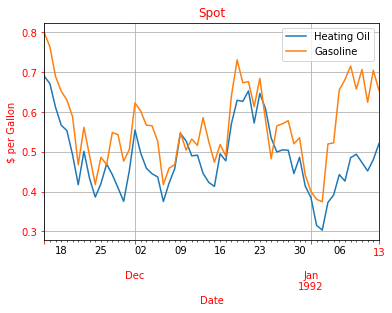

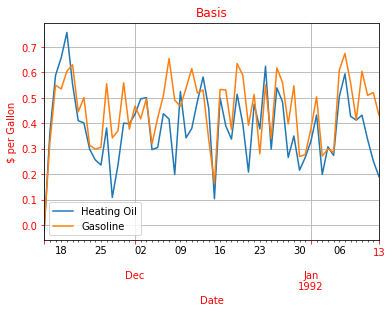

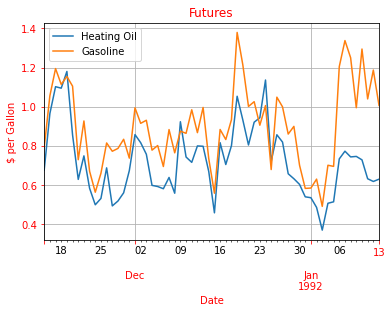

In [35]:


ts.plot(grid=True)
plt.ylabel("$ per Gallon", color="red")
plt.xlabel("Date", color="red")
plt.title("Spot", color="red")
plt.tick_params(axis="both", colors="red"),

tb.plot(grid=True)
plt.ylabel("$ per Gallon", color="red")
plt.xlabel("Date", color="red")
plt.title("Basis", color="red")
plt.tick_params(axis="both", colors="red"),




tf.plot(grid=True)
plt.ylabel("$ per Gallon", color="red")
plt.xlabel("Date", color="red")
plt.title("Futures", color="red")
plt.tick_params(axis="both", colors="red")

<br>

### Calculate Market-to-Market Cash Flows

<br>

In [8]:
contract_size = 42000
prc_gsln = f2 
prc_htngl = f1 

In [9]:
prc_diff_htngl = np.diff(prc_htngl)
prc_diff_gsln = np.diff(prc_gsln),

In [10]:
cf_htngl = prc_diff_htngl * contract_size
cf_gsln = prc_diff_gsln * contract_size

In [11]:
cum_cf_htngl = np.cumsum(cf_htngl);
cum_cf_gsln = np.cumsum(cf_gsln),

In [12]:
cum_cf_htngl

array([ 2.99811659e+03,  1.27863844e+04,  2.41217615e+04,  4.57965159e+04,
        3.97953164e+04,  2.72671066e+04,  2.63342227e+04,  1.34979061e+04,
        1.70308844e+04,  1.98474967e+04,  1.02188450e+04,  9.56945414e+03,
        8.00500608e+03, -2.45558342e+03,  4.64752901e+03,  1.57846823e+03,
       -3.44804381e+03, -6.20650822e+03, -3.46638678e+03, -2.77435066e+03,
       -8.53473269e+02, -1.33722601e+03,  3.62931255e+03,  9.13802695e+03,
        8.82631334e+03, -1.84518237e+03,  7.92926496e+03, -4.06372498e+03,
       -4.11266082e+03, -4.74266983e+03, -9.27968004e+03, -1.06232868e+04,
       -4.64973012e+03,  8.04231170e+02,  2.04688209e+03,  6.11988567e+03,
       -8.96216105e+02,  2.42721264e+03,  3.30458525e+03,  8.38636879e+03,
        6.45292835e+03,  1.49346792e+04,  2.13606998e+04,  3.44527420e+03,
        3.46489334e+03, -1.01945541e+03, -8.69396670e+03, -2.04379809e+03,
        2.44805339e+02,  6.66949875e+03,  1.36925003e+01,  5.07652043e+03,
        7.72783569e+03,  

In [13]:
cum_cf_gsln

(array([2.30114754e-01, 3.53841769e-01, 4.52129782e-01, ...,
        7.97645501e+03, 7.97676440e+03, 7.97645736e+03]),)

In [14]:
class MarginAccount(object):
    def __init__(self, spot_price, init_margin, var_margin, num_contracts, units):
        self.__ref_price = spot_price
        self.__init_margin = init_margin
        self.__var_margin = var_margin
        self.__num_contracts = num_contracts
        self.__units = units
        self.__equity = init_margin
        self.__capital = init_margin
        self.__profit = 0.0
        self.__cum_profit = 0.0
        self.__margin_call = 0.0

    def show(self):
        print("Settlement Price: \t{0:.2f}".format(self.__ref_price))
        print("Profit: \t\t{0:.2f}".format(self.__profit))
        print("Cumulative Profit: \t{0:.2f}".format(self.__cum_profit))
        print("Capital: \t\t{0:.2f}".format(self.__capital))
        print("Equity: \t\t{0:.2f}".format(self.__equity))
        print("Margin Call: \t\t{0:.2f}".format(self.__margin_call))
        print("\n")

    def update(self, spot_price):
        self.__profit = (spot_price - self.__ref_price) * (self.__num_contracts * self.__units)
        self.__cum_profit += self.__profit
        self.__equity = self.__capital + self.__cum_profit
        
        if self.__equity <= self.__var_margin:
            self.__margin_call = self.__init_margin - self.__equity
        else:
            self.__margin_call = 0.0
        
        self.__capital += self.__margin_call
        self.__ref_price = spot_price


spot0 = np.exp(ln_spot1[0])
spot_t = np.exp(ln_spot1)
units = 42000
num_contracts = 1
initmarper = .1
varmarper = .85
init_margin = (initmarper * units * spot_t[0])
var_margin = varmarper * init_margin

acc = MarginAccount(spot0, init_margin, var_margin, num_contracts, units) 

for i, spot in enumerate(spot_t):
    acc.update(spot)
    print("Day t={0:d}".format(i+1))
    print("--------")
    acc.show()

Day t=1
--------
Settlement Price: 	0.80
Profit: 		4620.00
Cumulative Profit: 	4620.00
Capital: 		3360.00
Equity: 		7980.00
Margin Call: 		0.00


Day t=2
--------
Settlement Price: 	0.74
Profit: 		-2673.78
Cumulative Profit: 	1946.22
Capital: 		3360.00
Equity: 		5306.22
Margin Call: 		0.00


Day t=3
--------
Settlement Price: 	0.78
Profit: 		2000.65
Cumulative Profit: 	3946.87
Capital: 		3360.00
Equity: 		7306.87
Margin Call: 		0.00


Day t=4
--------
Settlement Price: 	0.71
Profit: 		-3271.13
Cumulative Profit: 	675.75
Capital: 		3360.00
Equity: 		4035.75
Margin Call: 		0.00


Day t=5
--------
Settlement Price: 	0.72
Profit: 		426.73
Cumulative Profit: 	1102.48
Capital: 		3360.00
Equity: 		4462.48
Margin Call: 		0.00


Day t=6
--------
Settlement Price: 	0.66
Profit: 		-2415.14
Cumulative Profit: 	-1312.66
Capital: 		4672.66
Equity: 		2047.34
Margin Call: 		1312.66


Day t=7
--------
Settlement Price: 	0.65
Profit: 		-254.46
Cumulative Profit: 	-1567.12
Capital: 		4672.66
Equity: 		31

In [18]:
class MarginAccount(object):
    def __init__(self, spot_price, init_margin, var_margin, num_contracts, units):
        self.__ref_price = spot_price
        self.__init_margin = init_margin
        self.__var_margin = var_margin
        self.__num_contracts = num_contracts
        self.__units = units
        self.__equity = init_margin
        self.__capital = init_margin
        self.__profit = 0.0
        self.__cum_profit = 0.0
        self.__margin_call = 0.0

    def show(self):
        print("Settlement Price: \t{0:.2f}".format(self.__ref_price))
        print("Profit: \t\t{0:.2f}".format(self.__profit))
        print("Cumulative Profit: \t{0:.2f}".format(self.__cum_profit))
        print("Capital: \t\t{0:.2f}".format(self.__capital))
        print("Equity: \t\t{0:.2f}".format(self.__equity))
        print("Margin Call: \t\t{0:.2f}".format(self.__margin_call))
        print("\n")

    def update(self, spot_price):
        self.__profit = (spot_price - self.__ref_price) * (self.__num_contracts * self.__units)
        self.__cum_profit += self.__profit
        self.__equity = self.__capital + self.__cum_profit
        
        if self.__equity <= self.__var_margin:
            self.__margin_call = self.__init_margin - self.__equity
        else:
            self.__margin_call = 0.0
        
        self.__capital += self.__margin_call
        self.__ref_price = spot_price



spot0 = np.exp(ln_spot2[0])
spot_t = np.exp(ln_spot2)
units = 42000
num_contracts = 1
initmarper = .1
varmarper = .85
init_margin = (initmarper * units * spot_t[0])
var_margin = varmarper * init_margin

acc = MarginAccount(spot0, init_margin, var_margin, num_contracts, units) 

for i, spot in enumerate(spot_t):
    acc.update(spot)
    print("Day t={0:d}".format(i+1))
    print("--------")
    acc.show()

Day t=1
--------
Settlement Price: 	0.80
Profit: 		0.00
Cumulative Profit: 	0.00
Capital: 		3360.00
Equity: 		3360.00
Margin Call: 		0.00


Day t=2
--------
Settlement Price: 	0.69
Profit: 		-4571.77
Cumulative Profit: 	-4571.77
Capital: 		7931.77
Equity: 		-1211.77
Margin Call: 		4571.77


Day t=3
--------
Settlement Price: 	0.72
Profit: 		1186.34
Cumulative Profit: 	-3385.43
Capital: 		7931.77
Equity: 		4546.34
Margin Call: 		0.00


Day t=4
--------
Settlement Price: 	0.62
Profit: 		-4034.45
Cumulative Profit: 	-7419.88
Capital: 		10779.88
Equity: 		511.89
Margin Call: 		2848.11


Day t=5
--------
Settlement Price: 	0.63
Profit: 		342.69
Cumulative Profit: 	-7077.19
Capital: 		10779.88
Equity: 		3702.69
Margin Call: 		0.00


Day t=6
--------
Settlement Price: 	0.63
Profit: 		-47.40
Cumulative Profit: 	-7124.59
Capital: 		10779.88
Equity: 		3655.29
Margin Call: 		0.00


Day t=7
--------
Settlement Price: 	0.54
Profit: 		-3764.31
Cumulative Profit: 	-10888.90
Capital: 		14248.90
Equity

<br>

### Calculate Minimum Variance Hedge Ratio (via OLS)

<br>

In [183]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(f1,ln_spot1)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(f2,ln_spot2)

In [227]:
print(f"The estimated minimum-variance hedge ratio (via OLS) for heating oil is: {slope1 : 0.4f}"),
print(f"The estimated minimum-variance hedge ratio (via OLS) for gasoline is: {slope2 : 0.4f}")

The estimated minimum-variance hedge ratio (via OLS) for heating oil is:  0.5606
The estimated minimum-variance hedge ratio (via OLS) for gasoline is:  0.5474


In [15]:
M = 10000
N = 52 * 5
betaHat = np.empty(M)
Rsqrd = np.empty(M)

for i in range(M):
    y = basis1
    x = f1
    reg = stats.linregress(x,y)
    betaHat[i] = reg.slope
    Rsqrd[i] = reg.rvalue ** 2

In [19]:
import statsmodels.api as sm

N = 52 * 5
x = np.exp(ln_spot1)
u = np.random.normal(size=N, loc=0.0, scale=2.0)
y = f1

df = pd.DataFrame(dict(y=pd.Series(y), x=pd.Series(x)))

reg = stats.linregress(x,y)
uhat = y - reg.intercept - reg.slope * x
results = sm.tsa.stattools.adfuller(uhat)
print(f"The ADF test statistic is: {results[0]: 0.4f}, with a p-value of: {results[1] : 0.4f}, we can reject the null hypothesis of the dickey fuller test and we can conclude that spot price of heating oil and futures prices of heating oil are cointegrated, ")

The ADF test statistic is: -6.6411, with a p-value of:  0.0000, we can reject the null hypothesis of the dickey fuller test and we can conclude that spot price of heating oil and futures prices of heating oil are cointegrated, 


In [20]:
x = np.exp(ln_spot2)
u = np.random.normal(size=N, loc=0.0, scale=2.0)
y = f2

df = pd.DataFrame(dict(y=pd.Series(y), x=pd.Series(x)))

reg = stats.linregress(x,y)
uhat = y - reg.intercept - reg.slope * x
results = sm.tsa.stattools.adfuller(uhat)
print(f"The ADF test statistic is: {results[0]: 0.4f}, with a p-value of: {results[1] : 0.4f}, we can reject the null hypothesis of the dickey fuller test and we can conclude that spot price of heating oil and futures prices of heating oil are cointegrated, ")

The ADF test statistic is: -5.1946, with a p-value of:  0.0000, we can reject the null hypothesis of the dickey fuller test and we can conclude that spot price of heating oil and futures prices of heating oil are cointegrated, 
